
## 1. Manipulação dos Dados e Featuring Engineering ## 

O primeiro passo a ser feito para se iniciar a análise, manipulação e exploração de dados é importar alguns pacotes que serão usados ao longo do trabalho e também definir o diretório de trabalho.


In [129]:
import numpy as np 
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.feature_selection import chi2
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
import scipy.stats as norm

In [4]:
## DEFININDO O DIRETORIO DE TRABALHO ##
import os
os.chdir('C:/Users/DPL/Desktop/Projetos e Trabalhos/SICOOB')
os.getcwd()

'C:\\Users\\DPL\\Desktop\\Projetos e Trabalhos\\SICOOB'

Em seguida importarei a base de dados.

In [54]:
df = pd.read_excel('dados.xlsx', sheet_name='Planilha1')
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,target
0,1.098612,50,1,1724.61,0.0,0.0,729.07,765.69,0
1,0.000000,41,2,2198.59,0.0,0.0,0.00,0.00,0
2,1.098612,39,2,1633.05,0.0,0.0,915.17,1108.55,0
3,0.000000,66,1,2111.51,0.0,0.0,881.79,1317.67,0
4,0.000000,42,1,1632.38,0.0,0.0,898.72,170.96,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      10000 non-null  float64
 1   v2      10000 non-null  int64  
 2   v3      10000 non-null  int64  
 3   v4      10000 non-null  float64
 4   v5      10000 non-null  float64
 5   v6      10000 non-null  float64
 6   v7      10000 non-null  float64
 7   v8      10000 non-null  float64
 8   target  10000 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 703.2 KB


In [22]:
df.isnull().sum()

v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
target    0
dtype: int64

A base de dados é composta de 9 variáveis (8 dependentes e 1 explicativa - target). Há 3 variáveis do tipo integer, as quais devem representar categorias, e outras 6 variáveis do tipo float. 
Não há valores faltantes (missing) na base de dados

##### Transformando as variáveis que estão como integer para object

In [107]:
to_object = [
            'v1',
            'v3',
            'target']

for i in to_object:
    df[i] = df[i].astype("object")

In [44]:
df[to_object].dtypes

v1        object
v3        object
target    object
dtype: object

In [7]:
df['target'].value_counts()

0    8850
1    1150
Name: target, dtype: int64

Ao realizar a contagem dos valores da variável target observa-se que a maior concentração de dados está na categoria "0". Há a possibildiade de a categoria "1" representar uma anomalia, como por exemplo: classificação em fraude ou a probabilidade de um cliente deixar a instituição "Churn"

A análise exploratória de dados irá averiguar as diferenças significativas entre estes dois grupos

In [8]:
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

# 2. Análise Exploratória de Dados

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
v1,10000.0,0.245341,0.449645,0.0,0.0000,0.000,0.693147,2.197225
v4,10000.0,1775.627776,215.729086,0.0,1634.6500,1724.685,1890.822500,3223.210000
v5,10000.0,25.439553,126.381291,0.0,0.0000,0.000,0.000000,854.130000
v6,10000.0,79.244001,372.316123,0.0,0.0000,0.000,0.000000,3094.910000
v7,10000.0,793.964402,378.858728,0.0,726.3975,912.825,1037.955000,1635.800000
v8,10000.0,785.160602,776.180405,0.0,0.0000,638.805,1526.665000,2552.690000


## 2.1. V1 (categorias por Score?)

In [9]:
df['v1'].value_counts()

0.000000    7487
0.693147    1175
1.098612     875
1.386294     348
1.609438      79
1.791759      21
1.945910       8
2.079442       4
2.197225       3
Name: v1, dtype: int64

In [10]:
df_0['v1'].value_counts()

0.000000    6576
0.693147    1082
1.098612     783
1.386294     309
1.609438      66
1.791759      21
1.945910       7
2.197225       3
2.079442       3
Name: v1, dtype: int64

In [11]:
df_1['v1'].value_counts()

0.000000    911
0.693147     93
1.098612     92
1.386294     39
1.609438     13
1.945910      1
2.079442      1
Name: v1, dtype: int64

Text(0.5, 1.0, 'v1')

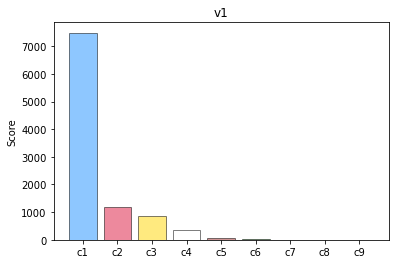

In [12]:
objects = ('c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9')
y_pos = np.arange(len(objects))
colors = ['dodgerblue', 'crimson', 'gold', 'white', 'brown', 'green',
         'pink', 'black', 'purple']
plt.bar(y_pos, df['v1'].value_counts(), align='center', alpha=0.5, color = colors, edgecolor = 'black')
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('v1')

In [13]:
v1_crosstab = pd.crosstab(df['v1'], df['target'], margins = False)
print(v1_crosstab)

target       0    1
v1                 
0.000000  6576  911
0.693147  1082   93
1.098612   783   92
1.386294   309   39
1.609438    66   13
1.791759    21    0
1.945910     7    1
2.079442     3    1
2.197225     3    0


## 2.2. V2 (Idade?)

In [35]:
df.groupby('target').v2.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,8850.0,44.546215,13.987271,6.0,33.0,43.0,55.0,117.0
1,1150.0,41.760870,12.769335,19.0,32.0,40.0,51.0,89.0


<AxesSubplot:xlabel='target', ylabel='v2'>

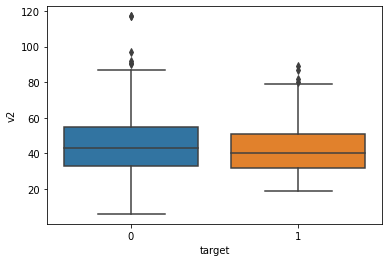

In [38]:
sns.boxplot(y='v2', x = 'target', data=df)

No handles with labels found to put in legend.


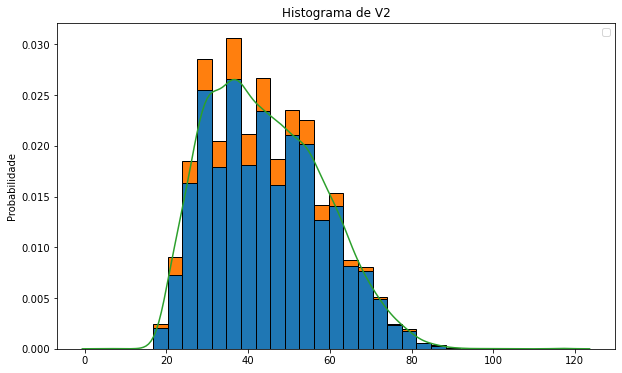

In [39]:
v1 = df_0['v2']
v2 = df_1['v2']
v3 = np.concatenate((df_0['v2'],df_1['v2']))

plt.figure(figsize=(10, 6))
plt.hist([v1, v2], 31, histtype='barstacked', density=True, edgecolor='black');
sns.kdeplot(v3);
plt.legend()
plt.ylabel('Probabilidade')
plt.title(r'Histograma de V2')
plt.show()



## 2.3. V3 (Categoria?)

In [40]:
df['v3'].value_counts()

2    5271
1    3767
3     962
Name: v3, dtype: int64

In [42]:
df_0['v3'].value_counts()

2    4751
1    3240
3     859
Name: v3, dtype: int64

In [43]:
df_1['v3'].value_counts()

1    527
2    520
3    103
Name: v3, dtype: int64

## 2.4. V4 (Valor transacionado?)

In [14]:
df.groupby('target').v4.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,8850.0,1778.781221,217.141548,0.0,1638.00,1725.64,1890.8600,3223.21
1,1150.0,1751.359957,202.989465,0.0,1623.68,1718.52,1867.6375,2782.16


<AxesSubplot:xlabel='target', ylabel='v4'>

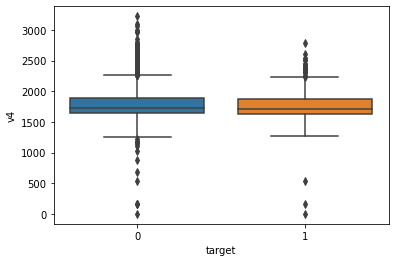

In [15]:
sns.boxplot(y='v4', x = 'target', data=df)

No handles with labels found to put in legend.


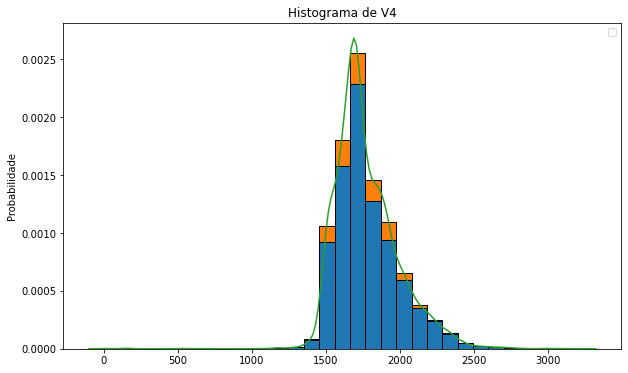

In [16]:
v1 = df_0['v4']
v2 = df_1['v4']
v3 = np.concatenate((df_0['v4'],df_1['v4']))

plt.figure(figsize=(10, 6))
plt.hist([v1, v2], 31, histtype='barstacked', density=True, edgecolor='black');
sns.kdeplot(v3);
plt.legend()
plt.ylabel('Probabilidade')
plt.title(r'Histograma de V4')
plt.show()


## 2.5. V5 ()

In [18]:
df['v5'].value_counts()

0.00      9542
854.13     105
230.82      94
365.84      61
461.64      50
535.94      32
596.66      30
647.99      24
692.45      15
766.76      15
827.47      13
731.68      12
798.50       7
Name: v5, dtype: int64

In [19]:
df_0['v5'].value_counts()

0.00      8727
230.82      35
461.64      17
854.13      17
365.84      16
596.66      13
692.45       7
535.94       6
647.99       4
766.76       4
827.47       2
731.68       2
Name: v5, dtype: int64

In [21]:
df_1['v5'].value_counts()

0.00      815
854.13     88
230.82     59
365.84     45
461.64     33
535.94     26
647.99     20
596.66     17
827.47     11
766.76     11
731.68     10
692.45      8
798.50      7
Name: v5, dtype: int64

## 2.6. V6 ()

In [57]:
df['v6'].value_counts()

0.00       9542
1863.08       1
2032.63       1
1728.21       1
1380.94       1
           ... 
1755.08       1
1952.48       1
1343.35       1
1442.39       1
1997.06       1
Name: v6, Length: 459, dtype: int64

In [31]:
df.groupby('target').v6.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,8850.0,23.442070,204.233384,0.0,0.0,0.0,0.0000,3094.91
1,1150.0,508.676252,822.507457,0.0,0.0,0.0,1280.1425,2718.66


<AxesSubplot:xlabel='target', ylabel='v6'>

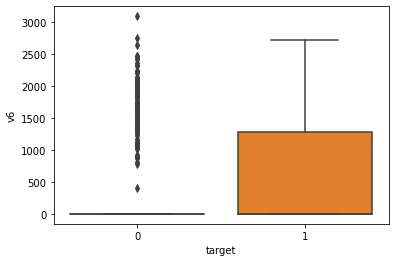

In [32]:
sns.boxplot(y='v6', x = 'target', data=df)

No handles with labels found to put in legend.


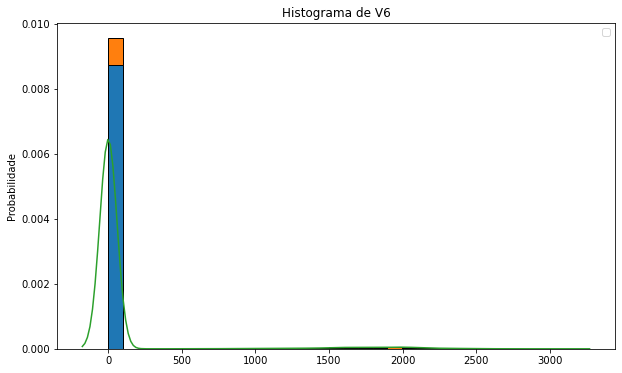

In [34]:
v1 = df_0['v6']
v2 = df_1['v6']
v3 = np.concatenate((df_0['v6'],df_1['v6']))

plt.figure(figsize=(10, 6))
plt.hist([v1, v2], 31, histtype='barstacked', density=True, edgecolor='black');
sns.kdeplot(v3);
plt.legend()
plt.ylabel('Probabilidade')
plt.title(r'Histograma de V6')
plt.show()


## 2.7. V7 ()

In [35]:
df.groupby('target').v7.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,8850.0,776.254656,389.675514,0.0,695.68,904.295,1033.7825,1635.80
1,1150.0,930.252443,242.135488,0.0,850.93,965.035,1064.5325,1566.64


<AxesSubplot:xlabel='target', ylabel='v7'>

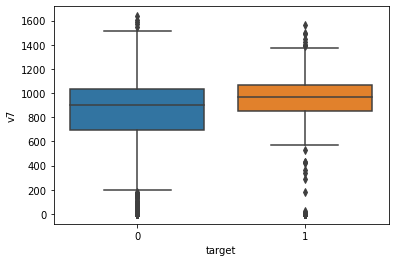

In [36]:
sns.boxplot(y='v7', x = 'target', data=df)

No handles with labels found to put in legend.


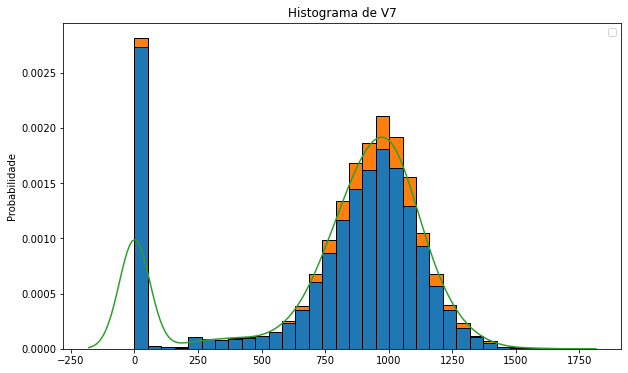

In [37]:
v1 = df_0['v7']
v2 = df_1['v7']
v3 = np.concatenate((df_0['v7'],df_1['v7']))

plt.figure(figsize=(10, 6))
plt.hist([v1, v2], 31, histtype='barstacked', density=True, edgecolor='black');
sns.kdeplot(v3);
plt.legend()
plt.ylabel('Probabilidade')
plt.title(r'Histograma de V7')
plt.show()

## 2.8. V8 ()

In [38]:
df.groupby('target').v8.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,8850.0,855.668198,777.563099,0.0,0.0,848.99,1573.8575,2552.69
1,1150.0,242.558670,503.458951,0.0,0.0,0.00,121.3600,2336.20


<AxesSubplot:xlabel='target', ylabel='v7'>

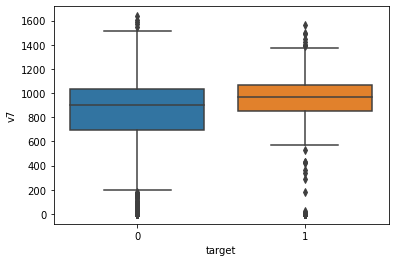

In [39]:
sns.boxplot(y='v7', x = 'target', data=df)

No handles with labels found to put in legend.


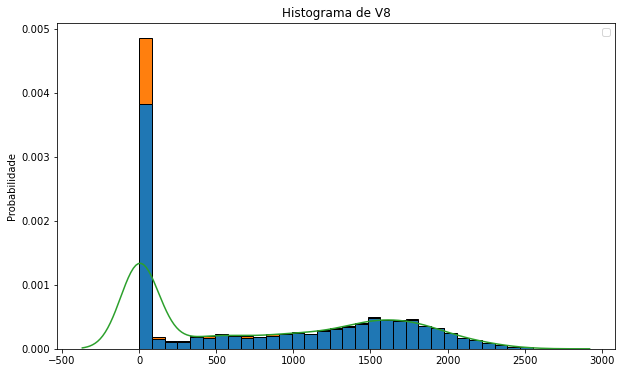

In [40]:
v1 = df_0['v8']
v2 = df_1['v8']
v3 = np.concatenate((df_0['v8'],df_1['v8']))

plt.figure(figsize=(10, 6))
plt.hist([v1, v2], 31, histtype='barstacked', density=True, edgecolor='black');
sns.kdeplot(v3);
plt.legend()
plt.ylabel('Probabilidade')
plt.title(r'Histograma de V8')
plt.show()

# 3. Testes de Hipóteses

## 3.1. Teste de Normalidade

#### Teste de normalidade - Shapiro-Wilk

- H0: Dados seguem distribuição normal
- H1: Dados não seguem distribuição normal

In [71]:
numerical = df.select_dtypes(include='float')

In [73]:
for col in numerical.columns:
    stat, p = shapiro(df[col])
    print(f"{col}\n Estatística de teste={stat}\n P-valor={p} \n\n")

v1
 Estatística de teste=0.5927214622497559
 P-valor=0.0 


v4
 Estatística de teste=0.928329586982727
 P-valor=0.0 


v5
 Estatística de teste=0.20179212093353271
 P-valor=0.0 


v6
 Estatística de teste=0.21468281745910645
 P-valor=0.0 


v7
 Estatística de teste=0.8178486824035645
 P-valor=0.0 


v8
 Estatística de teste=0.8413853645324707
 P-valor=0.0 




C:\Users\DPL\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [76]:
numerical_1 = df.select_dtypes(include='int64')

In [77]:
for col in numerical_1.columns:
    stat, p = shapiro(df[col])
    print(f"{col}\n Estatística de teste={stat}\n P-valor={p} \n\n")

v2
 Estatística de teste=0.9764981865882874
 P-valor=1.5783163157399396e-37 


v3
 Estatística de teste=0.7682526707649231
 P-valor=0.0 


target
 Estatística de teste=0.37017756700515747
 P-valor=0.0 




#### Apenas os dados da distribuição da variável v2 segue a distribuição normal

## 3.2. Correlações

In [55]:
num_var_keep = ['v1',
                'v2',
                'v4',
                'v5',
                'v6',
                'v7',
                'v8']

<AxesSubplot:>

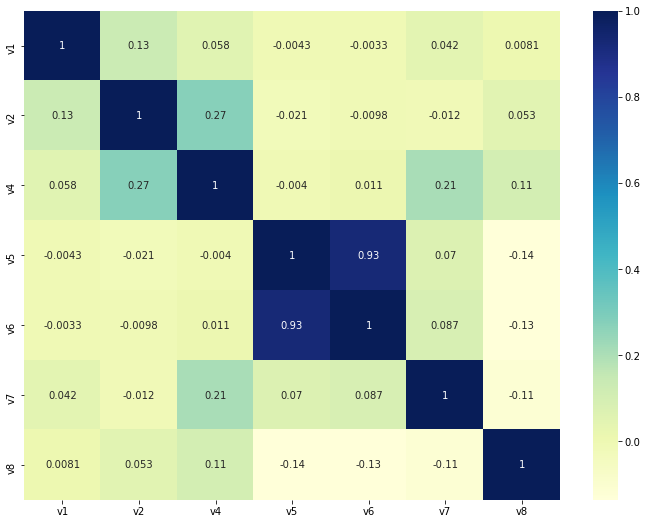

In [56]:
plt.figure(figsize=(12, 9))
sns.heatmap(df[num_var_keep].corr(), annot=True, cmap="YlGnBu")

In [58]:
num_var_keep2 = ['v1',
                'v2',
                'v4',
                'v6',
                'v7',
                'v8']

<AxesSubplot:>

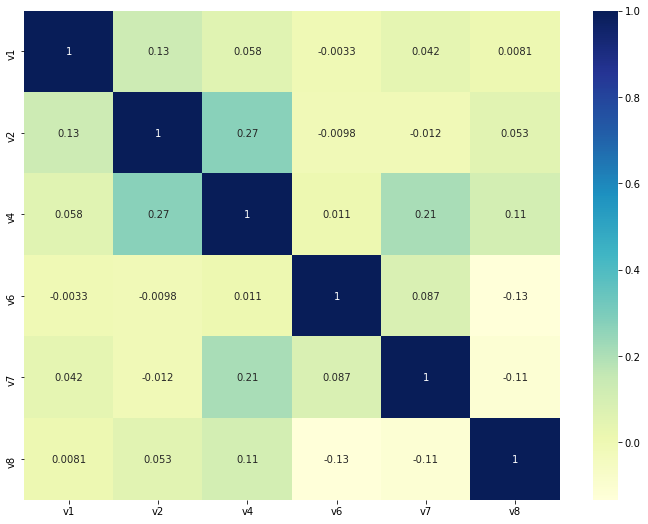

In [59]:
plt.figure(figsize=(12, 9))
sns.heatmap(df[num_var_keep2].corr(), annot=True, cmap="YlGnBu")

## 3.3. Diferenças entre os grupos da Target

#### Teste de Mann-Whitney

- H0: Não existe diferença entre os grupos
- H1: Há diferença entre os grupos

In [84]:
for col in numerical.columns:
    stat, p = mannwhitneyu(df[df['target'] == 0][col], df[df['target'] == 1][col])
    print(f"{col}\n Estatística de teste={stat}\n P-valor={p} \n\n")

v1
 Estatística de teste=4864892.5
 P-valor=0.0006939714827136885 


v4
 Estatística de teste=4818456.5
 P-valor=0.0016683247410844047 


v5
 Estatística de teste=3672950.0
 P-valor=0.0 


v6
 Estatística de teste=3674782.5
 P-valor=0.0 


v7
 Estatística de teste=4079082.5
 P-valor=2.3802052690642844e-28 


v8
 Estatística de teste=2788410.0
 P-valor=1.3945882667992553e-146 




In [90]:
    stat, p = mannwhitneyu(df[df['target'] == 0]['v2'], df[df['target'] == 1]['v2'])
    print(f"{'v2'}\n Estatística de teste={stat}\n P-valor={p} \n\n")

v2
 Estatística de teste=4541414.5
 P-valor=1.3881638265999099e-09 




#### Serão consideradas no modelo apenas as variáveis que apresentaram p-valor menor que 0,05 no teste de Mann-Whitney

In [143]:
num_var_keep2 = ['v1',
                'v2',
                'v4',
                'v6',
                'v7',
                'v8']

## 3.4. Analisando as variáveis categóricas

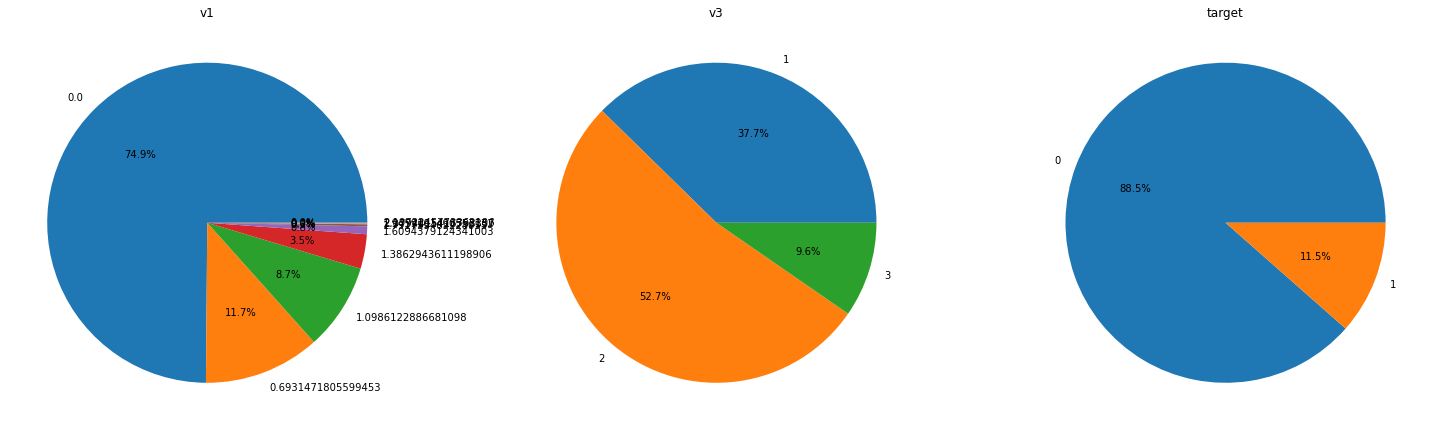

In [120]:
categorical = df.select_dtypes(include='object')

df_class_0 = df[df['target']==0]
df_class_1 = df[df['target']==1]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in categorical.columns:
    idx += 1
    plt.subplot(1, 3, idx)
    att = df.groupby(df[col]).count()
    plt.pie(x=att['v2'], labels=att.index, autopct='%1.1f%%')
    plt.title(f"{col}")
plt.tight_layout()

In [121]:
for i in categorical.columns:
    print(f"{i}: \n {df[i].value_counts()}\n\n")

v1: 
 0.000000    7487
0.693147    1175
1.098612     875
1.386294     348
1.609438      79
1.791759      21
1.945910       8
2.079442       4
2.197225       3
Name: v1, dtype: int64


v3: 
 2    5271
1    3767
3     962
Name: v3, dtype: int64


target: 
 0    8850
1    1150
Name: target, dtype: int64




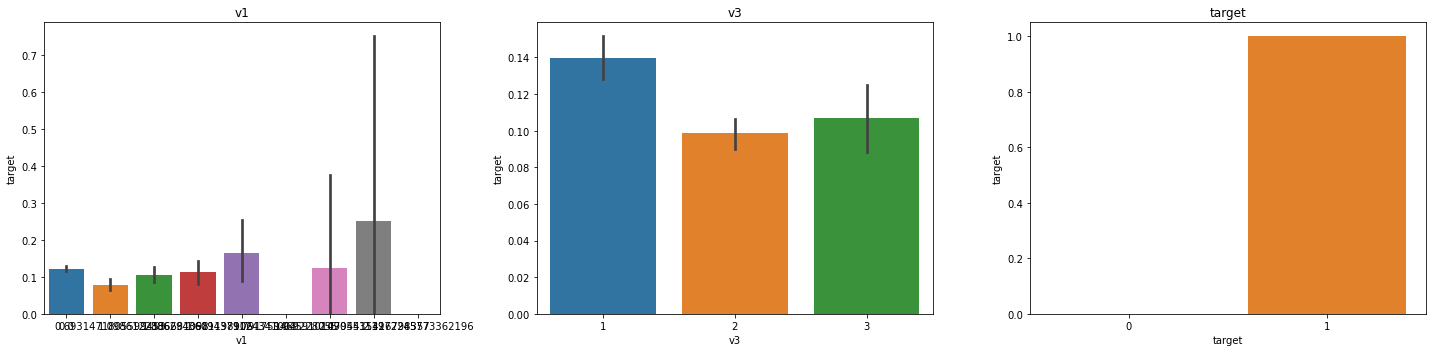

In [128]:
categorical = df.select_dtypes(include='object')

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,5))
fig.subplots_adjust(hspace=1, wspace=1)
# categorical.drop('target', axis = 1, inplace=True)

idx = 0
for col in categorical.columns:
    idx += 1
    plt.subplot(1, 3, idx)
    att = df.groupby(df[col]).count()
    sns.barplot(data = df, x=df[col], y='target')
    plt.title(f"{col}")
plt.tight_layout()

##### Teste qui-quadrado

- H0: Não há associação entre as variáveis
- H1: Há associação entre as variáveis

In [142]:
dfc = pd.DataFrame()
le = preprocessing.LabelEncoder()

for col in categorical.columns:
    dfc[col] = le.fit_transform(df[col])
    chi_sqs = chi2(dfc[[col]], dfc['v1'])
    scores = pd.Series(chi_sqs[0])
    pvalues = pd.Series(chi_sqs[1])
    print(chi_sqs)
    print(f"coluna: {col}, Estatística de teste: {scores}, p-Value: {pvalues} \n")

(array([18387.50556793]), array([0.]))
coluna: v1, Estatística de teste: 0    18387.505568
dtype: float64, p-Value: 0    0.0
dtype: float64 

(array([200.26740077]), array([5.61243234e-39]))
coluna: v3, Estatística de teste: 0    200.267401
dtype: float64, p-Value: 0    5.612432e-39
dtype: float64 

(array([21.88864711]), array([0.00512638]))
coluna: target, Estatística de teste: 0    21.888647
dtype: float64, p-Value: 0    0.005126
dtype: float64 



#### Serão levadas para o modelo as variáveis cujo p-valor do teste qui-quadrado for maior que 5%

In [139]:
cat_var_keep = ['v1',
               'v3']

##### Após todo processo de exploração de dados e testes iniciais, decidiu-se pela eliminação da variável v5, por esta ter grande correlação com  a variável v6, não sendo assim conveniente prosseguir com as duas variáveis para o modelo. Todas as demais variáveis foram mantidas por critérios técnicos dos testes de Mann-Whitney e correlação.